In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o conjunto de dados
df = pd.read_csv('../../Processados/heart_final.csv')
df.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [115]:
# Separar x e y
X = df.drop(columns=['target'])
y = df['target']


## Técnica de reamostragem: Stratified K-Fold Cross Validation

O uso de K-fold Cross Validation é crucial em conjuntos de dados desbalanceados para garantir uma avaliação robusta e não enviesada do modelo. Como uma das classes apresenta a proporção de 0.54276315789, mesmo que a diferença é pouca achamos necessário manter a proporção para que a amostragem de treinamento possa ser o mais parecido possivel com o dataset. 

In [116]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=958)

# Exemplo de uso
print("Proporção de pessoas com doença no datset:", y.mean())
print("Proporção de pessoas com doença nos dados de treino:", y_train.mean())
print("Proporção de pessoas com doença nos dados de teste:", y_test.mean())

Proporção de pessoas com doença no datset: 0.543046357615894
Proporção de pessoas com doença nos dados de treino: 0.5414364640883977
Proporção de pessoas com doença nos dados de teste: 0.5454545454545454


## Parametros utilizados pela arvore

- ### criterion='entropy'
O critério de entropia é utilizado para medir a impureza de uma divisão em uma árvore de decisão. Em termos de árvores de decisão, uma divisão com menor entropia significa que os nós resultantes são mais homogêneos em relação à variável alvo.



In [117]:
#classificador de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy',random_state=958)


clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=958)

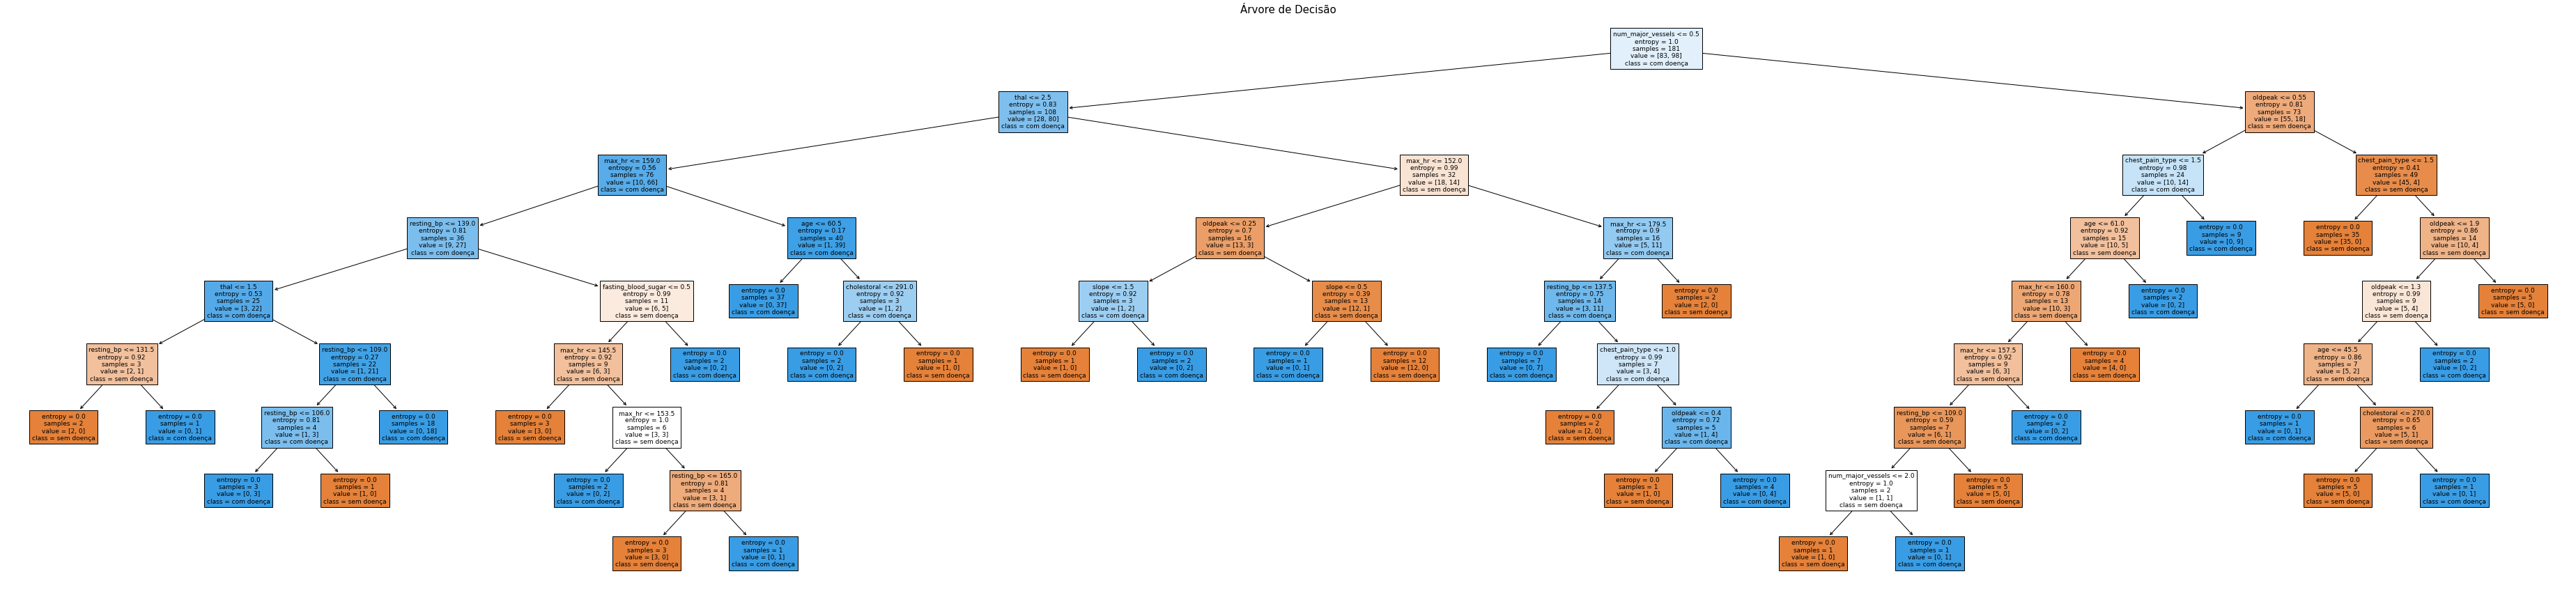

In [118]:
plt.figure(figsize=(66, 15)) 
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['sem doença', 'com doença'],  fontsize=9, precision=2)
plt.title("Árvore de Decisão", fontsize=15)  # Título da árvore
plt.savefig('arvore_decisao1.png', format='png', dpi=300)  
plt.show()

In [119]:
# Previsões nos dados de treino e teste
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print(f'Acurácia nos dados de treino: {accuracy_score(y_train, y_train_pred)}')
print(f'Acurácia nos dados de teste:  {accuracy_score(y_test, y_test_pred)}')


Acurácia nos dados de treino: 1.0
Acurácia nos dados de teste:  0.71900826446281


In [120]:
#Função para plotar a matrz de confusão
def plotar_matrix(y_real, y_previsto, title):
    
    # Calcular
    cm = confusion_matrix(y_real, y_previsto)

    # Plotar
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', cbar=False,
                annot_kws={'fontsize': 18}, 
                xticklabels=['Sem Doença', 'Com Doença'],
                yticklabels=['Sem Doença', 'Com Doença'])
    plt.xlabel('Valor Previsto')
    plt.ylabel('Valor Real')
    plt.title(title)
    plt.savefig(title+'.png', format='png', dpi=400)
    plt.show()



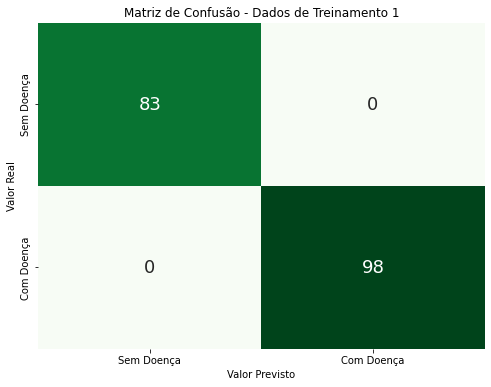

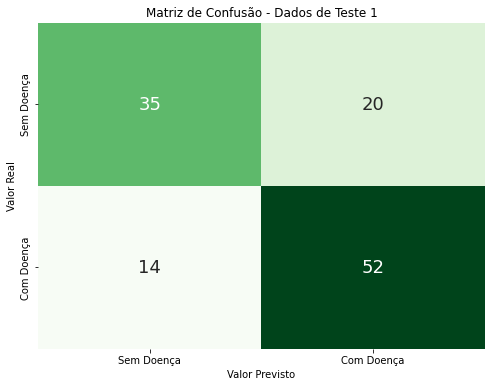

In [121]:

plotar_matrix(y_train, y_train_pred, 'Matriz de Confusão - Dados de Treinamento 1')
plotar_matrix(y_test, y_test_pred, 'Matriz de Confusão - Dados de Teste 1')


# Detecção de overfitting
O modelo apresentado teve um acerto de 100% no conjunto de treinamento, significando que o modelo apresenta overfitting.
Para resolver iremos refazer o modelo, mas limitando a profundidade da árvore.

- ### max_depth
Limitar a profundidade da árvore é uma técnica de regularização que visa prevenir o overfitting.

## Modelo ajustado limitando a profundidade 

Primeiramente, vamos determinar qual o melhor valor para o max_depth

Melhor Max Depth: 3


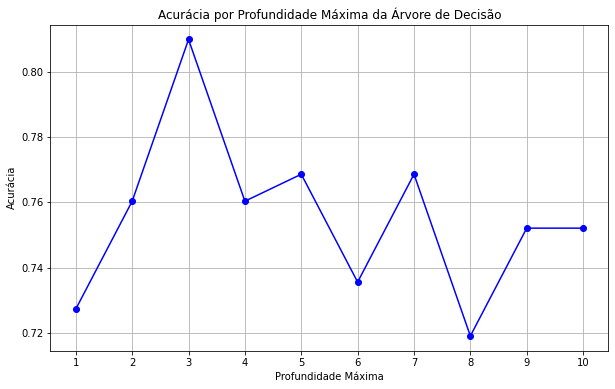

<Figure size 432x288 with 0 Axes>

In [131]:



melhor_max_depth = 0
melhor_accuracy = 0
acuracias = []

for max_depth in range(1, 11):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=958, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    acuracias.append(accuracy)
    
    if accuracy > melhor_accuracy:
        melhor_accuracy = accuracy
        melhor_max_depth = max_depth

print(f'Melhor Max Depth: {melhor_max_depth}')

# Plotar as acurácias
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), acuracias, marker='o', linestyle='-', color='b')
plt.title('Acurácia por Profundidade Máxima da Árvore de Decisão')
plt.xlabel('Profundidade Máxima')
plt.ylabel('Acurácia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
plt.savefig('acuracia_por_profundidade_maxima.png')

## Melhor Max Depth: 3

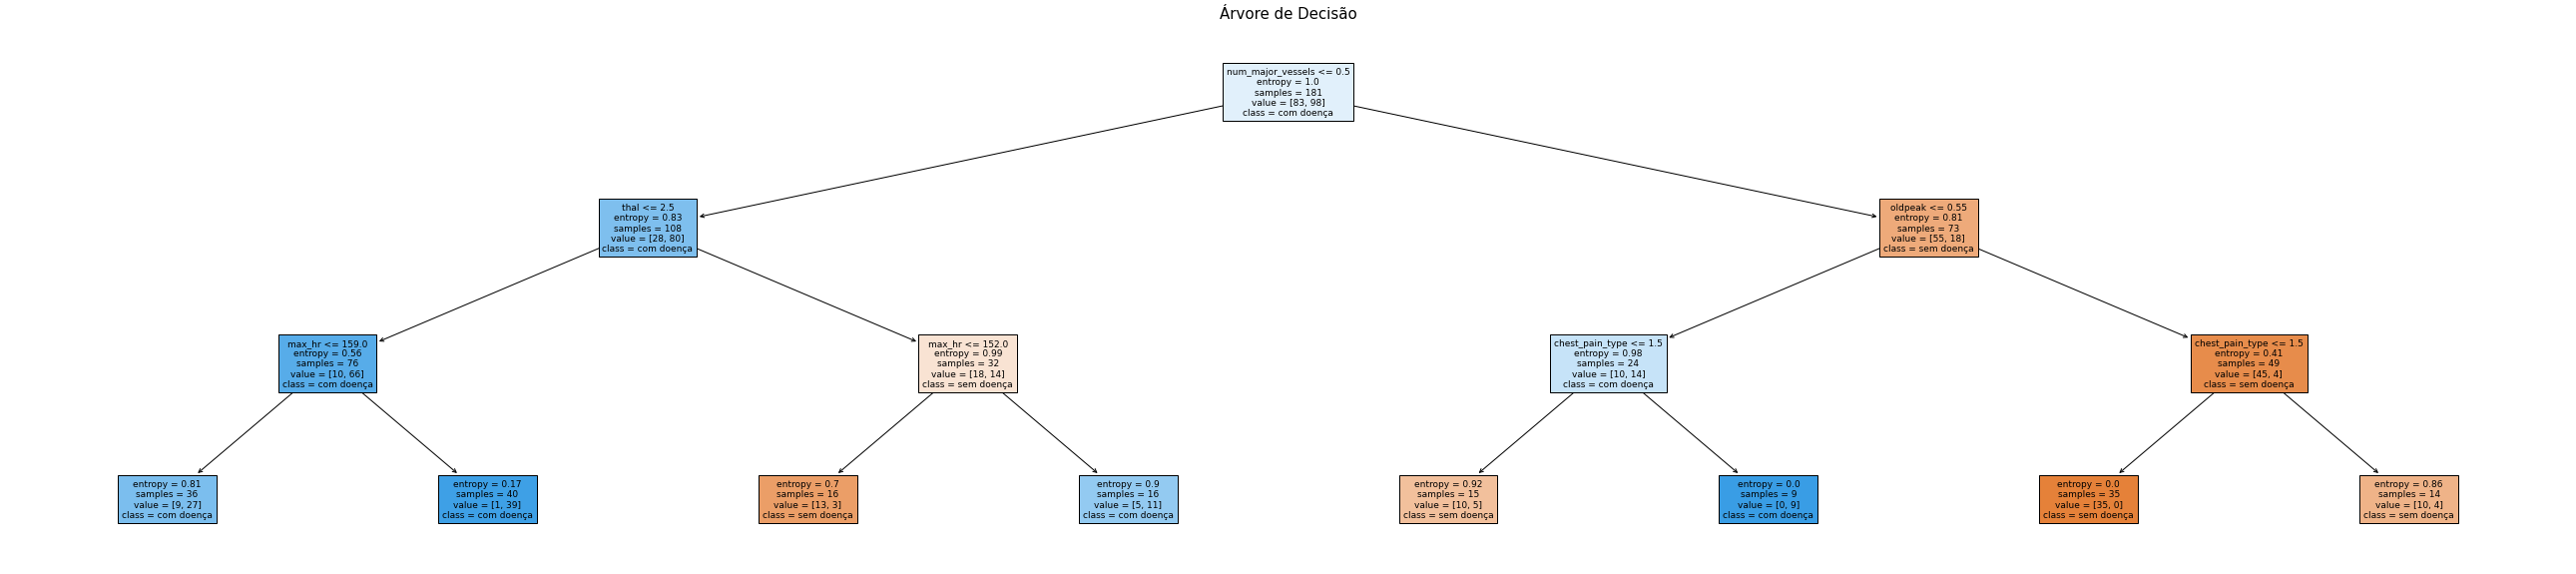

Acurácia nos dados de treino: 0.850828729281768
Acurácia nos dados de teste:  0.8099173553719008


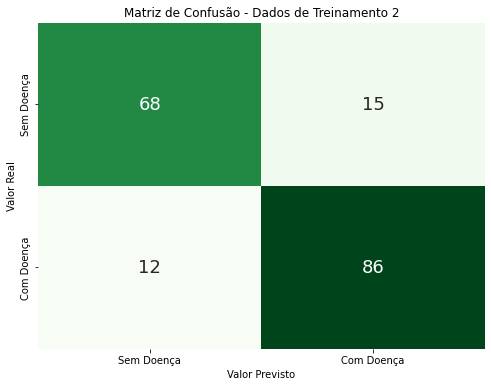

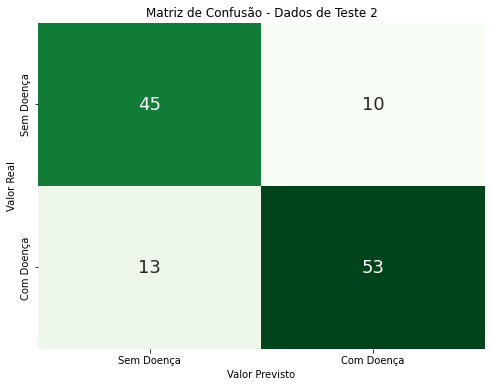

In [123]:
#classificador de árvore de decisão
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=958)


clf.fit(X_train, y_train)
plt.figure(figsize=(46, 10)) 
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['sem doença', 'com doença'],  fontsize=9, precision=2)
plt.title("Árvore de Decisão", fontsize=15)  # Título da árvore
plt.savefig('arvore_decisao2.png', format='png', dpi=300)  
plt.show()

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print(f'Acurácia nos dados de treino: {accuracy_score(y_train, y_train_pred)}')
print(f'Acurácia nos dados de teste:  {accuracy_score(y_test, y_test_pred)}')
plotar_matrix(y_train, y_train_pred, 'Matriz de Confusão - Dados de Treinamento 2')
plotar_matrix(y_test, y_test_pred, 'Matriz de Confusão - Dados de Teste 2')

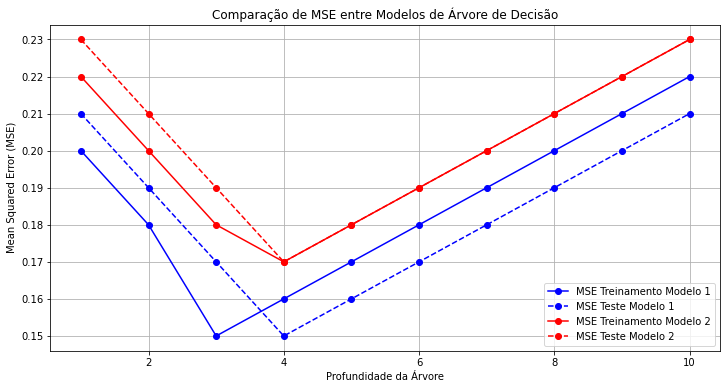

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Supondo que você já tenha as acurácias de dois modelos
# Exemplo de valores para modelo 1 e modelo 2 em profundidades de 1 a 10
train_accuracies_model_1 = [0.8, 0.82, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80, 0.79, 0.78]
test_accuracies_model_1 = [0.79, 0.81, 0.83, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80, 0.79]
train_accuracies_model_2 = [0.78, 0.80, 0.82, 0.83, 0.82, 0.81, 0.80, 0.79, 0.78, 0.77]
test_accuracies_model_2 = [0.77, 0.79, 0.81, 0.83, 0.82, 0.81, 0.80, 0.79, 0.78, 0.77]

# Calcular o MSE
mse_train_model_1 = [1 - acc for acc in train_accuracies_model_1]
mse_test_model_1 = [1 - acc for acc in test_accuracies_model_1]
mse_train_model_2 = [1 - acc for acc in train_accuracies_model_2]
mse_test_model_2 = [1 - acc for acc in test_accuracies_model_2]

# Profundidades das árvores
depths = list(range(1, 11))

# Plotar o gráfico de MSE
plt.figure(figsize=(12, 6))

# Gráfico do Modelo 1
plt.plot(depths, mse_train_model_1, marker='o', linestyle='-', color='blue', label='MSE Treinamento Modelo 1')
plt.plot(depths, mse_test_model_1, marker='o', linestyle='--', color='blue', label='MSE Teste Modelo 1')

# Gráfico do Modelo 2
plt.plot(depths, mse_train_model_2, marker='o', linestyle='-', color='red', label='MSE Treinamento Modelo 2')
plt.plot(depths, mse_test_model_2, marker='o', linestyle='--', color='red', label='MSE Teste Modelo 2')

# Títulos e rótulos
plt.title('Comparação de MSE entre Modelos de Árvore de Decisão')
plt.xlabel('Profundidade da Árvore')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()
